In [33]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage import feature
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops


In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
frames = io.imread('../doc/CHCl_CA_DES_5_31_19.tiff')

In [4]:
frames.shape

(6668, 120, 160)

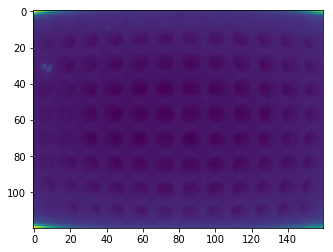

In [58]:
plt.imshow(frames[1])

### Adding all the images in the frame to get a better contrast and reduce noise

In [67]:
for II in range(frames.shape[0]):
    frame = frames[II]
    img_eq = (frame - np.amin(frame))/(np.amax(frame)-np.amin(frame))
    if II == 0:
        img_ave = img_eq
    else:
        img_ave = img_ave + img_eq
img_average = img_ave/frames.shape[0]
img_eq = (img_ave - np.amin(img_ave))/(np.amax(img_ave)-np.amin(img_ave))

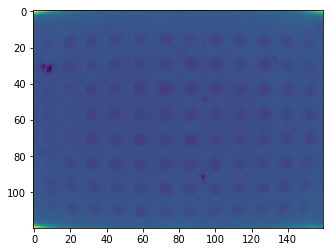

In [68]:
plt.imshow(img_eq)

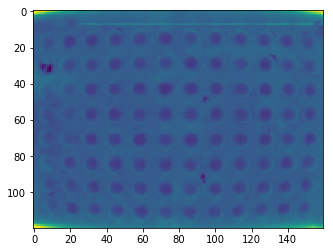

In [73]:
contrast = equalize_adapthist(img_eq)
plt.imshow(contrast)

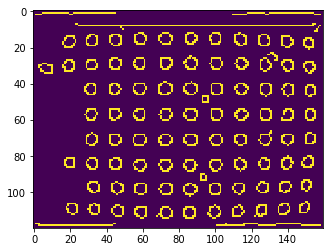

In [74]:
edges = feature.canny(contrast)
plt.imshow(edges)

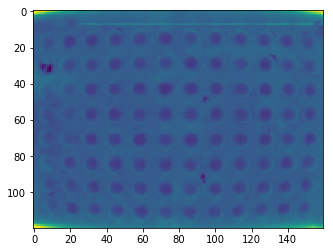

In [34]:
stretch = rescale_intensity(contrast)
plt.imshow(stretch)

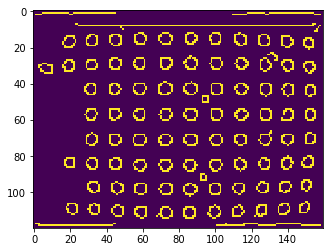

In [35]:
edges1 = feature.canny(stretch)
plt.imshow(edges1)

### Flatplate edge detection

In [53]:
flatplate = io.imread('../doc/Proline_MA_5_31_19_Flat_Plate_2.jpeg',as_gray=True)

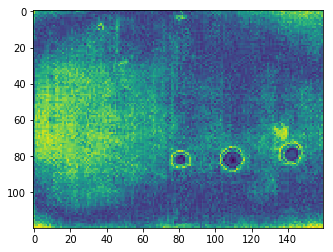

In [54]:
plt.imshow(flatplate)

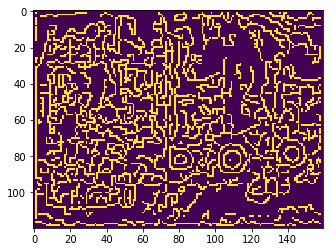

In [55]:
flat_edges = feature.canny(flatplate)
plt.imshow(flat_edges)